# GAN


In [10]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
%tensorflow_version 1.x
print(tf.__version__)

import warnings
warnings.filterwarnings("ignore")



UsageError: Line magic function `%tensorflow_version` not found.


In [31]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Embedding
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.merge import concatenate
from keras.models import Sequential, Model
#from keras.optimizers import Adam
#from keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import scipy.stats

### Dataframe


In [6]:
df = pd.read_csv("bmi_data_events.csv")
df

,patient_id,Gender,Height,Weight,bmi,bmi_class,2017,2018,2019,2020
0,90329,Male,1.875714,109.721075,31.19,severely overweight,laakarikaynti 2,laakarikaynti 4,laakarikaynti 2,laakarikaynti 1
1,82793,Male,1.747060,73.622792,24.12,healthy,ei jatkotoimenpiteita,laakarikaynti 1,ei jatkotoimenpiteita,ei jatkotoimenpiteita
2,98691,Male,1.882397,96.497629,27.23,overweight,laakarikaynti 2,laakarikaynti 1,laakarikaynti 1,laakarikaynti 2
3,20430,Male,1.821967,99.809586,30.07,severely overweight,laakarikaynti 1,ei jatkotoimenpiteita,laakarikaynti 2,ei jatkotoimenpiteita
4,96554,Male,1.774998,93.598695,29.71,overweight,laakarikaynti 4,laakarikaynti 4,laakarikaynti 4,laakarikaynti 3
...,...,...,...,...,...,...,...,...,...,...
9995,51506,Female,1.680785,62.041210,21.96,healthy,ei jatkotoimenpiteita,ei jatkotoimenpiteita,laakarikaynti 1,ei jatkotoimenpiteita
9996,38900,Female,1.703506,77.504378,26.71,overweight,laakarikaynti 3,laakarikaynti 2,laakarikaynti 4,ei jatkotoimenpiteita
9997,26718,Female,1.622247,58.275424,22.14,healthy,ei jatkotoimenpiteita,ei jatkotoimenpiteita,ei jatkotoimenpiteita,laakarikaynti 1
9998,67447,Female,1.753470,74.322226,24.17,healthy,ei jatkotoimenpiteita,laakarikaynti 1,laakarikaynti 1,ei jatkotoimenpiteita


#### Categorical and numerical data

In [7]:
numerical_data = df.select_dtypes("number")
categorical_data = df.select_dtypes("object")
numerical_data

,patient_id,Height,Weight,bmi
0,90329,1.875714,109.721075,31.19
1,82793,1.747060,73.622792,24.12
2,98691,1.882397,96.497629,27.23
3,20430,1.821967,99.809586,30.07
4,96554,1.774998,93.598695,29.71
...,...,...,...,...
9995,51506,1.680785,62.041210,21.96
9996,38900,1.703506,77.504378,26.71
9997,26718,1.622247,58.275424,22.14
9998,67447,1.753470,74.322226,24.17


### Data preprocessing

#### numerical data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
#Rescaleing data between 0-1
mms = MinMaxScaler()
numerical_data_rescaled = mms.fit_transform(numerical_data)
numerical_data_rescaled

array([[0.90343165, 0.79172838, 0.863139  , 0.89533561],
       [0.82805733, 0.58695829, 0.4754764 , 0.49317406],
       [0.98706754, 0.8023644 , 0.72113127, 0.67007964],
       ...,
       [0.26720077, 0.38830089, 0.31065968, 0.38054608],
       [0.67456817, 0.59715974, 0.48298768, 0.4960182 ],
       [0.70073314, 0.31052854, 0.23843869, 0.30546075]])

#### Categorical data

In [16]:
ohe_data = pd.get_dummies(categorical_data)
ohe_data

,Gender_Female,Gender_Male,bmi_class_healthy,bmi_class_overweight,bmi_class_severely overweight,bmi_class_underweight,2017_ei jatkotoimenpiteita,2017_laakarikaynti 1,2017_laakarikaynti 2,2017_laakarikaynti 3,...,2019_ei jatkotoimenpiteita,2019_laakarikaynti 1,2019_laakarikaynti 2,2019_laakarikaynti 3,2019_laakarikaynti 4,2020_ei jatkotoimenpiteita,2020_laakarikaynti 1,2020_laakarikaynti 2,2020_laakarikaynti 3,2020_laakarikaynti 4
0,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9996,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
9997,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9998,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [17]:
gender_ohe = ohe_data.iloc[:, 0:2]
bmi_class_ohe = ohe_data.iloc[:, 2:6]
events_ohe = ohe_data.iloc[:, 6:]

In [18]:
print("numerical data shape:", numerical_data_rescaled.shape)
print("gender ohe data shape:", gender_ohe.shape)
print("bmi class ohe data shape:", bmi_class_ohe.shape)
print("events ohe data shape:", events_ohe.shape)

numerical data shape: (10000, 4)
gender ohe data shape: (10000, 2)
bmi class ohe data shape: (10000, 4)
events ohe data shape: (10000, 20)


# GAN for generating numerical data

#### Generator
 * Generator takes input from the random normal distribution (latent_dim)
 * Output the same number of columns as the original (n_columns)
 * Generator will not be compiled, because we update generator based on the discriminators error


In [19]:
def build_generator(n_columns, latent_dim):
    model = Sequential()
    model.add(Dense(32, kernel_initializer = "he_uniform", input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(64,  kernel_initializer = "he_uniform"))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(128,  kernel_initializer = "he_uniform"))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(n_columns, activation = "sigmoid"))
    return model

#### Initialize generator 

In [21]:
from keras.models import Sequential, Model

In [26]:
latent_dim = 50
generator = build_generator(numerical_data_rescaled.shape[1], latent_dim)


#### Discriminator
 * Dicscriminator input is the generator output
 * Outputs classification (real or generated data)

In [37]:
def build_discriminator(inputs_n):
	model = Sequential()
	model.add(Dense(128,  kernel_initializer = "he_uniform", input_dim = inputs_n))
	model.add(LeakyReLU(0.2))
	model.add(Dense(64,  kernel_initializer = "he_uniform"))
	model.add(LeakyReLU(0.2))
	model.add(Dense(32,  kernel_initializer = "he_uniform"))
	model.add(LeakyReLU(0.2))
	model.add(Dense(16,  kernel_initializer = "he_uniform"))
	model.add(LeakyReLU(0.2))
	model.add(Dense(1, activation = "sigmoid"))
	model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
	return model

#### Initialize discriminator and plot model


In [38]:
discriminator = build_discriminator(numerical_data_rescaled.shape[1])


#### GAN
 * Satck generator and discriminator
 * GAN input is generator input
 * GAN output classification generated or original data (discriminator output)
 

In [42]:
def build_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect generator and dicriminator
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss = "binary_crossentropy", optimizer = 'adam')
	return model

#### Compile GAN and plot model

In [43]:
gan = build_gan(generator, discriminator)


#### GAN training

In [58]:
def train(gan, generator, discriminator, data, latent_dim, n_epochs, n_batch, n_eval):
    #Half batch size for updateting discriminator
    half_batch = int(n_batch / 2)

    #lists for stats from the model
    generator_loss = []
    discriminator_loss = []

    #generate class labels for fake = 0 and real = 1
    valid = np.ones((half_batch, 1))
    fake = np.zeros((half_batch, 1))
    y_gan = np.ones((n_batch, 1))
    #training loop
    for i in range(n_epochs):
        
        #select random batch from the real numerical data
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_data = data[idx]
        
        #generate fake samples from the noise
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_data = generator.predict(noise)

        #train the discriminator and return losses
        d_loss_real, _ = discriminator.train_on_batch(real_data, valid)
        d_loss_fake, _ = discriminator.train_on_batch(fake_data, fake)

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        discriminator_loss.append(d_loss)

        #generate noise for generator input and  train the generator (to have the discriminator label samples as valid)
        noise = np.random.normal(0, 1, (n_batch, latent_dim))
        g_loss = gan.train_on_batch(noise, y_gan)
        generator_loss.append(g_loss)

        #evaluate progress
        #if (i+1) % n_eval == 0:
        print ("Epoch: %d [Generator loss: %f] [Discriminator loss: %f]" % (i + 1, g_loss, d_loss))

    #plot losses after training
    plt.figure(figsize = (20, 10))
    plt.plot(generator_loss, label = "Generator loss")
    plt.plot(discriminator_loss, label = "Discriminator loss")
    plt.title("Stats from training GAN")
    plt.legend()
    plt.grid()
    

Epoch: 1 [Generator loss: 0.697277] [Discriminator loss: 0.702741]
Epoch: 2 [Generator loss: 0.706214] [Discriminator loss: 0.705413]
Epoch: 3 [Generator loss: 0.711099] [Discriminator loss: 0.703652]
Epoch: 4 [Generator loss: 0.720046] [Discriminator loss: 0.708507]
Epoch: 5 [Generator loss: 0.721177] [Discriminator loss: 0.713297]
Epoch: 6 [Generator loss: 0.725089] [Discriminator loss: 0.715437]
Epoch: 7 [Generator loss: 0.726046] [Discriminator loss: 0.711347]
Epoch: 8 [Generator loss: 0.727197] [Discriminator loss: 0.718283]
Epoch: 9 [Generator loss: 0.728746] [Discriminator loss: 0.706770]
Epoch: 10 [Generator loss: 0.730094] [Discriminator loss: 0.712605]
Epoch: 11 [Generator loss: 0.729778] [Discriminator loss: 0.710289]
Epoch: 12 [Generator loss: 0.730270] [Discriminator loss: 0.707326]
Epoch: 13 [Generator loss: 0.732490] [Discriminator loss: 0.717646]
Epoch: 14 [Generator loss: 0.736784] [Discriminator loss: 0.698649]
Epoch: 15 [Generator loss: 0.745274] [Discriminator loss:

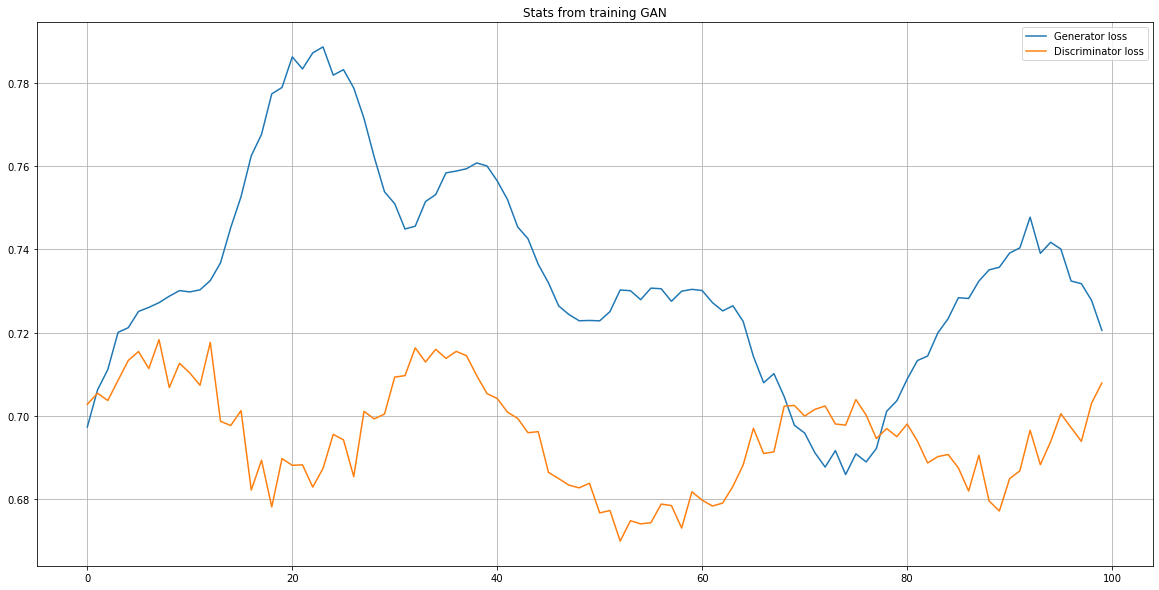

In [59]:
train(gan, generator, discriminator, numerical_data_rescaled, latent_dim, n_epochs = 100, n_batch = 1024, n_eval = 250)

### Generating numerical data with generator




In [46]:
noise = np.random.normal(0, 1, (10000, latent_dim))
generated_numerical_data = generator.predict(noise)
generated_numerical_data

array([[0.05668381, 0.46570823, 0.46869963, 0.58335334],
       [0.12829313, 0.3638177 , 0.09543583, 0.43815267],
       [0.09659386, 0.20309213, 0.09719786, 0.20532724],
       ...,
       [0.9999596 , 0.985214  , 0.99832195, 0.9929483 ],
       [0.9973967 , 0.9102522 , 0.94117016, 0.98163044],
       [0.99735117, 0.9482455 , 0.9802422 , 0.9200922 ]], dtype=float32)

### Converting the generated data to similar as the original

In [47]:
generated_numerical_data = mms.inverse_transform(generated_numerical_data)
gen_df = pd.DataFrame(data = generated_numerical_data, columns = numerical_data.columns)
gen_df

,patient_id,Height,Weight,bmi
0,5670.304199,1.670881,72.991753,25.705351
1,12829.875977,1.606865,38.234257,23.152725
2,9660.549805,1.505883,38.398335,19.059654
3,99910.539062,1.985025,120.923660,32.756638
4,48352.468750,1.932742,114.055809,27.995317
...,...,...,...,...
9995,66019.335938,1.767809,66.614502,30.052277
9996,61596.644531,1.653139,50.125835,25.918068
9997,99979.960938,1.997278,122.309013,32.906033
9998,99723.718750,1.950181,116.987167,32.707062


### Comaparing original and generated data
 * Normal distribution
 * mean, std, var
 * correlation matrix

In [48]:
def normal_distribution(r, f):

	r_x = np.linspace(r.min(), r.max(), len(r))
	f_x = np.linspace(f.min(), f.max(), len(f))

	r_y = scipy.stats.norm.pdf(r_x, r.mean(), r.std())
	f_y = scipy.stats.norm.pdf(f_x, f.mean(), f.std())
 
	n, bins, patches = plt.hist([r, f], density = True, alpha = 0.5, color = ["green", "red"])
	xmin, xmax = plt.xlim()

	plt.plot(r_x, r_y, color = "green", label = "Original data", alpha = 0.5)
	plt.plot(f_x, f_y, color = "red", label = "Generated data", alpha = 0.5)
	title = f"Original data mean {np.round(r.mean(), 4)}, Original data std {np.round(r.std(), 4)}, Original data var {np.round(r.var(), 4)}\nGenerated data mean {np.round(f.mean(), 4)}, Generated data {np.round(f.std(), 4)}, Generated data var {np.round(f.var(), 2)}"
	plt.title(title)
	plt.legend()
	plt.grid()
	plt.show()
 

patient_id Normal distribution


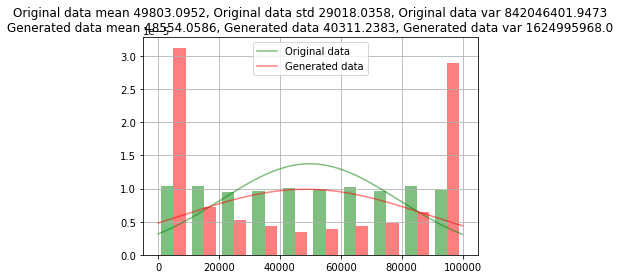

Height Normal distribution


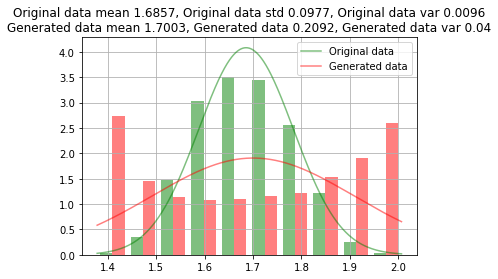

Weight Normal distribution


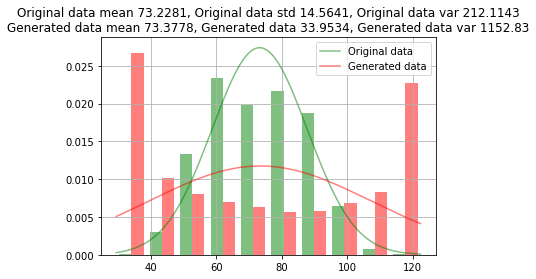

bmi Normal distribution


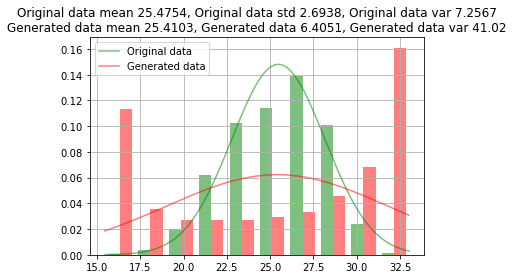

In [49]:
for column in gen_df.columns:
    print(column, "Normal distribution")
    normal_distribution(numerical_data[column], gen_df[column])

Original data


<AxesSubplot:>

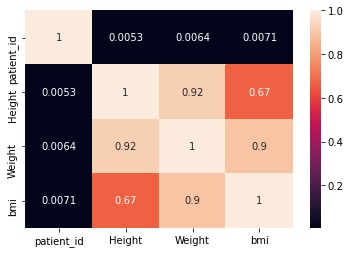

In [50]:
#correlation matrix compareing
print("Original data")
sns.heatmap(numerical_data.corr(), annot = True)

Generated data


<AxesSubplot:>

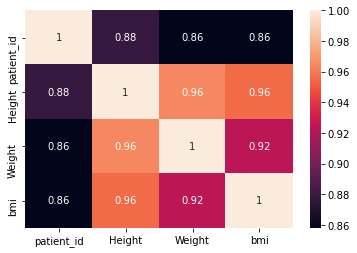

In [51]:
print("Generated data")
sns.heatmap(gen_df.corr(), annot = True)

# *Results*
 * normal distribution, mean, standard deviation and variance are very similar compared to the original
 * The correlation is very similar compared to the original


--------------------------------------------------------------------------------